
# Explorer



:header-args: :session explorer :results raw drawer

Proper program.




## Imports




### ipython



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Out[1]:


### pandas



In [1]:
import pandas as pd

# Out[2]:


## Data load




### load everything



1.  file list with path



In [1]:
import os
csv_files = []
date = "2018-09-30"
for dirpath, dirs, files in os.walk("../data/raw/" + date): 
  for filename in files:
    fname = os.path.join(dirpath,filename)
    if fname.endswith('.csv'):
      csv_files.append(fname)

# Out[49]:

1.  dataframe creation



In [1]:
jobs = pd.DataFrame()

for fl in csv_files:
    print(fl+(30-len(fl)//2)*" *")
    try:
        jobs_set = pd.read_csv(fl)
        jobs_set.dropna(axis=0, how='any', subset=["desc"], inplace=True)
        jobs_set.drop_duplicates(subset="desc", inplace=True)            
        try:                                                             
            jobs.iloc[0,0]                                               
            jobs = jobs.append(jobs_set)                                 
        except IndexError:                                               
            jobs = jobs_set                                              
    except pd.errors.EmptyDataError:
        pass

# Out[50]:

1.  TODO time range selection




### rename



use to quickly reset original df



In [1]:
df = jobs

# Out[51]:


### python example



x = 12
return x

return int(x)+1




### org doc elisp example



|1|
|2|
|3|
|4|




### python



"~/data/projects/jobseeker/data/raw/18-09-07/dsp.csv"

[None](None)

"~/data/projects/jobseeker/data/raw/18-09-07/dsp.csv"

[None](None)

"~/data/projects/jobseeker/data/raw/18-09-07/python.csv"

[None](None)

"~/data/projects/jobseeker/data/raw/18-09-07/data scientist.csv"

[None](None)

"~/data/projects/jobseeker/data/raw/18-09-07/software engineer.csv"

[None](None)




## Cleansing / Formating




### duplicates



1.  drop<sub>duplicates</sub>



In [1]:
df.drop_duplicates(subset="desc", inplace=True)

# Out[52]:

1.  count



In [1]:
df.title.count()

# Out[53]:
1837


### olders



1.  map lambda



In [1]:
df = df[df.days_ago.str.contains("30+").map(lambda x: not x)]

# Out[8]:

1.  ==False



In [1]:
df = df[df.days_ago.str.contains("30+")==False]

# Out[54]:

1.  count



In [1]:
len(df)

# Out[28]:
934


### string numbers to integers



In [1]:
df["days_ago"] = df.days_ago.apply(lambda x: int(x))

# Out[39]:


### drop erratic values



1.  run



In [1]:
df = df[df.days_ago.lt(30)]

# Out[81]:

1.  tests



In [1]:
df.days_ago.lt(30)

# Out[80]:
#+BEGIN_EXAMPLE
  3      True
  12     True
  14     True
  15     True
  19     True
  23     True
  27     True
  28     True
  35     True
  38     True
  45     True
  48     True
  55     True
  57     True
  59     True
  62     True
  63     True
  64     True
  65     True
  66     True
  75     True
  79     True
  82     True
  87     True
  91     True
  92     True
  93     True
  94     True
  96     True
  100    True
  ...
  44     True
  46     True
  49     True
  54     True
  55     True
  65     True
  68     True
  69     True
  70     True
  74     True
  77     True
  82     True
  84     True
  87     True
  89     True
  90     True
  93     True
  95     True
  96     True
  97     True
  102    True
  105    True
  109    True
  115    True
  116    True
  119    True
  121    True
  124    True
  126    True
  2      True
  Name: days_ago, Length: 1625, dtype: bool
#+END_EXAMPLE


### rename



In [1]:
df_clean = df

# Out[55]:


## Filtering




### Look for 1 keywords



1.  keyword definiton



1.  org variable



"kunst und medien"

kunst und medien



1.  look in title



1.  boolean serie construction



In [1]:
df.title.str.contains(k, case=False)

# Out[86]:
#+BEGIN_EXAMPLE
  3      False
  12     False
  14     False
  15     False
  19     False
  23     False
  27     False
  28     False
  35     False
  38     False
  45     False
  48     False
  55     False
  57     False
  59     False
  62     False
  63     False
  64     False
  65     False
  66     False
  75     False
  79     False
  82     False
  87     False
  91     False
  92     False
  93     False
  94     False
  96     False
  100    False
  ...
  44     False
  46     False
  49     False
  54     False
  55     False
  65     False
  68     False
  69     False
  70     False
  74     False
  77     False
  82     False
  84     False
  87     False
  89     False
  90     False
  93     False
  95     False
  96     False
  97     False
  102    False
  105    False
  109    False
  115    False
  116    False
  119    False
  121    False
  124    False
  126    False
  2      False
  Name: title, Length: 1623, dtype: bool
#+END_EXAMPLE

1.  reduction of our dataset



In [1]:
df = df[df.title.str.contains(k, case=False, na=False)]

# Out[92]:

1.  look in description



In [1]:
df = df[df.desc.str.contains(k, case=False, na=False)]

# Out[104]:

1.  TODO test



goto Johnny Kitchin



In [1]:
k

# Out[94]:
"# Out[91]:\n: 'database'"


### Queries



1.  get queries metadata



1.  dataframe using os results



In [1]:
import os
queries_name = []
queries_size = []
queries_path = []
queries_time = []
for dirpath, dirs, files in os.walk("../data/raw"): 
  for filename in files:
    if filename.endswith('.csv'):
      
      path = os.path.join(dirpath, filename)
      queries_path.append(path)
      
      size = os.path.getsize(path)
      queries_size.append(size)
      
      fname = filename.replace(".csv", "")
      queries_name.append(fname)
      
      time = os.path.getmtime(path)
      queries_time.append(time)

queries = pd.DataFrame({"name" : queries_name, "path" : queries_path, "size" : queries_size, "time" : queries_time})

# Out[33]:

1.  remove oldests results



1.  datetime time format



In [1]:
from datetime import datetime
queries["time"] = queries.time.apply(datetime.fromtimestamp)

# Out[34]:

1.  y-m-d format time



In [1]:
def format_time(x):
    y = x.strftime("%Y-%m-%d")
    return y

queries["time_formated"] = queries.time.apply(format_time)

# Out[35]:

1.  remove null size results



In [1]:
queries_null = queries[queries["size"] < 1]
queries = queries[queries["size"] > 1]

# Out[36]:

1.  number of entries in csv file



1.  read as pandas dataframe



In [1]:
def entries_count(csv):
    return len(pd.read_csv(csv))

queries["entries"] = queries.path.apply(entries_count)

# Out[37]:

1.  inspection



In [1]:
import humanize
queries["size_for_humans"] = queries["size"].apply(humanize.naturalsize)
queries.sort_values("size", ascending=False)[["name", "size_for_humans", "entries"]].reset_index()

# Out[38]:
#+BEGIN_EXAMPLE
  index                         name size_for_humans  entries
  0      134                         data          3.5 MB     1363
  1      133                       python          3.4 MB     1291
  2      121                 intelligence          3.2 MB     1108
  3      126                       pyjobs          3.2 MB     1260
  4      122  python-jobs-berlin-21-05-18          3.2 MB     1260
  5      119            software engineer          2.7 MB      774
  6      130                          aws          2.7 MB     1247
  7      127                    marketing          2.4 MB      956
  8      136                     database          2.3 MB      630
  9      124                      finance          2.3 MB      849
  10     114                      analyst          2.2 MB      873
  11     131                    developer          2.2 MB     1077
  12     112             business_analyst          1.7 MB      632
  13     113                       oracl

1.  time evolution



1.  return list for next scraper launch



1.  remove null size results before (or not)



In [1]:
queries_list = list(set(queries.name))

# Out[60]:

1.  save in a file for editing



In [1]:
with open("/queries/queries.txt", "w") as f:
    for query in queries_list:
        f.write(query + "\n")

# Out[67]:

1.  launch scraper with the list



1.  get list from file



In [1]:
with open("queries/best.txt", "r") as f:
    queries_selected = f.read()
    queries_selected = queries_selected.splitlines()

# Out[30]:

1.  run shell script as subprocess



1.  variables and imports



In [1]:
import subprocess
from subprocess import Popen, PIPE
import shlex

cwd = '/home/teddd/data/projects/jobseeker/data/external/indeed/'
bash_script = [cwd + 'local_crawler_launch.sh']
arguments = queries_selected
command = bash_script + arguments

# Out[276]:

1.  execution



1.  stdout to buffer



In [1]:
session = subprocess.Popen(command, stdout=PIPE, stderr=PIPE)
stdout, stderr = session.communicate()

if stderr:
    raise Exception("Error "+str(stderr))

stdout

# Out[255]:
b'\n\n\nScraping query : flask \nrunning command : scrapy crawl job_offers_spider -a query=flask -o flask.csv\n\n\n\nScraping query : frontend \nrunning command : scrapy crawl job_offers_spider -a query=frontend -o frontend.csv\n\n\n\nScraping query : french \nrunning command : scrapy crawl job_offers_spider -a query=french -o french.csv\n\n\n\nScraping query : css \nrunning command : scrapy crawl job_offers_spider -a query=css -o css.csv\n\n\n\nScraping query : midi \nrunning command : scrapy crawl job_offers_spider -a query=midi -o midi.csv\n\n\n\nScraping query : startup \nrunning command : scrapy crawl job_offers_spider -a query=startup -o startup.csv\n\n\n\nScraping query : busine
ss intelligence \nrunning command : scrapy crawl job_offers_spider -a query=business intelligence -o business intelligence.csv\n\n\n\nScraping query : numpy \nrunning command : scrapy crawl job_offers_spider -a query=numpy -o numpy.csv\n\n\n\nScraping query : linux \nrunning command : scrapy 

1.  stdout to file



In [1]:
from datetime import datetime
date = str(datetime.now())
with open("../data/external/crawl-log-" + date + ".txt",'w') as temp_file:
    crawl = subprocess.Popen(command, stdout=temp_file, cwd=cwd)

# Out[278]:


### Look for multiple keywords



1.  tool: keywords list



use results from Queries



1.  reduce dataframe



1.  boolean serie



In [1]:
df_bool = pd.DataFrame()
for query in queries_selected:
    df_bool[query] = df.desc.str.contains(query)

:RESULTS:
    # Out[75]:
    :END:

1.  binary serie



In [1]:
def bool_to_bin(x):
    if x is True:
        return 1
    else:
        return 0

df_bin = pd.DataFrame()

for query in queries_selected:
    df_bin[query] = df_bool[query].apply(bool_to_bin)

# Out[76]:

1.  score attribution



1.  overview



In [1]:
pd.concat({"title":df.title, "score":df_bin.sum(axis=1)}, axis=1).sort_values("score", ascending=False)

# Out[121]:
#+BEGIN_EXAMPLE
  score                                              title
  1       10           Head of Software Development // mediaire
  120      7         Senior Business Intelligence Analyst (m/f)
  110      6               Backend Developer (m/f) // Piloteers
  12       5                             Communications Manager
  51       5                  Frontend Engineer (m/f) // deevio
  22       5                           Lead Engineer Full Stack
  25       5                                Lead Data Scientist
  62       5              Senior Business Intelligence Engineer
  42       5   Conversion Rate Optimization (CRO) Manager (m/f)
  55       5                         IT Technical Support (m/w)
  113      5                    Backend Software Engineer (m/f)
  5        5                 Growth Hacker/Performance Marketer
  79       5                 Junior B2B Marketing Manager (f/m)
  68       5                           Software Developer (f/m)
  99       5  Ana

1.  reduce dataframe for visual exploration



In [1]:
df_print = df
df_print["score"] = df_bin.sum(axis=1)
df_print = df_print.sort_values("score", ascending=False)

# Out[122]:

1.  guide: used words



1.  amongst keywords



In [1]:
df_bin.sum().sort_values(ascending=False)

# Out[101]:
#+BEGIN_EXAMPLE
  git                      301
  data                     243
  marketing                105
  startup                  105
  backend                   72
  e business                64
  frontend                  50
  intelligence              44
  analyst                   22
  data scientist            16
  venture capital           12
  data visualization         9
  business intelligence      8
  online marketing           8
  python                     6
  html                       5
  sql                        5
  aws                        4
  french                     4
  github                     4
  numpy                      3
  pandas                     3
  linux                      2
  flask                      2
  css                        2
  live coding                2
  bsd                        1
  midi                       1
  unix                       0
  scraping                   0
  heroku                     0
  dtype: in

1.  which contains most of the querie keywords ?



1.  add weight to keywords ?



1.  keywords distance map



with all keywords, you are at the center




### companies



In [1]:
df = df[df.company.str.contains("berlin", case=False, na=False)]

# Out[86]:


## Stats




### overview



1.  head



In [1]:
df.head()

# Out[21]:
#+BEGIN_EXAMPLE
  Empty DataFrame
  Columns: [location, related, title, url, company, days_ago, contract, desc]
  Index: []
#+END_EXAMPLE

1.  count



In [1]:
len(df)

# Out[106]:
0


### days ago



1.  histogram



1.  pd plot



# Out[82]:

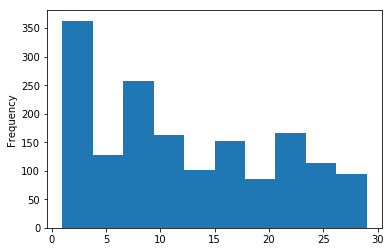

In [1]:
df.days_ago.plot.hist()

1.  value count



In [1]:
df.days_ago.value_counts()

# Out[41]:
#+BEGIN_EXAMPLE
  3     136
  1     125
  9     115
  2     109
  8      80
  7      74
  4      71
  10     70
  23     68
  11     68
  14     68
  24     57
  17     56
  16     55
  21     55
  18     52
  15     48
  22     47
  25     46
  28     40
  6      39
  29     38
  13     35
  12     28
  5      23
  27     20
  20     19
  19     16
  26     13
  46      1
  56      1
  Name: days_ago, dtype: int64
#+END_EXAMPLE

1.  groupby



1.  basic output



In [1]:
df.groupby(["days_ago"]).groups

# Out[54]:
#+BEGIN_EXAMPLE
  {1: Int64Index([20, 25, 49, 136], dtype='int64'),
  2: Int64Index([2, 4, 10, 30, 71, 77, 116, 125, 139], dtype='int64'),
  3: Int64Index([27, 54, 73, 98, 106, 128], dtype='int64'),
  4: Int64Index([29, 32, 60, 97, 114, 119, 143], dtype='int64'),
  5: Int64Index([50, 135], dtype='int64'),
  6: Int64Index([129], dtype='int64'),
  7: Int64Index([127], dtype='int64'),
  8: Int64Index([104, 112, 113, 121, 138], dtype='int64'),
  9: Int64Index([142], dtype='int64'),
  10: Int64Index([3, 96], dtype='int64'),
  11: Int64Index([86, 132], dtype='int64'),
  12: Int64Index([109], dtype='int64'),
  13: Int64Index([31], dtype='int64'),
  14: Int64Index([22, 24, 95], dtype='int64'),
  16: Int64Index([47], dtype='int64'),
  17: Int64Index([6, 37, 41], dtype='int64'),
  18: Int64Index([80], dtype='int64'),
  20: Int64Index([79], dtype='int64'),
  21: Int64Index([55], dtype='int64'),
  22: Int64Index([1, 144], dtype='int64'),
  23: Int64Index([21, 52, 75, 110], dtype='int64'

1.  loop print



In [1]:
grouped = df.groupby("days_ago")

for name,group in grouped:
    print(name)
    print(group)

# Out[52]:


## Printing




### quick overview



1.  head



In [1]:
df.head()

# Out[5]:
#+BEGIN_EXAMPLE
  location                                            related  \
  0   Berlin  https://de.indeed.com/Python-Developer-Jobs-in...
  1   Berlin                                                NaN
  2   Berlin  https://de.indeed.com/Senior-Software-Tester-J...
  3   Berlin  https://de.indeed.com/Lead-Product-Analyst-Job...
  4   Berlin  https://de.indeed.com/Softwareentwickler-Entwi...
  
  title  \
  0                             Python Developer (m/w)
  1                            Software-Entwickler w/m
  2                       Senior Software-Tester (w/m)
  3                               Lead Product Analyst
  4  Softwareentwickler (m/w) für Entwicklungsumgeb...
  
  url        company days_ago  \
  0  https://de.indeed.com/viewjob?jk=05f2b8ca5157f...  Bidmanagement      30+
  1  https://de.indeed.com/cmp/Qtixx-GmbH/jobs/Soft...     Qtixx GmbH       22
  2  https://de.indeed.com/viewjob?jk=d9b44d35ab5be...    Carmeq GmbH        2
  3  https://de.indeed.com/

1.  count



In [1]:
df.title.count()

# Out[6]:
146

1.  titles



In [1]:
df.title


### html pages



1.  hacked around solution



1.  function to save results to html



In [1]:
from datetime import datetime
from os import mkdir

def htmlexport(df, begin, end):
            date = str(datetime.now())
            path = "../reports/html/" + date + "/"
            mkdir(path)
            for i in range(begin, end):
                        html = ""
                        html = html + "\n"
                        html = html + "Job number " + str(i)
                        html = html + "\n"
                        html = html + "-"*100
                        html = html + "\n" + df.title.iloc[i]
                        html = html + "\n"
                        html = html + df.company.iloc[i]
                        html = html + "\n"
                        html = html + "-"*100
                        html = html + "\n"
                        html = html + df.desc.iloc[i]
                        html = html + "\n"*3
                        html = html + "-"*100
                        html = html + "\n"*3
                        filename = path + "job-" + str(i) + ".html"
                        with open(filename, "a") as file:
                                    file.write(html)

1.  call function



In [1]:
htmlexport(dfk, 0, dfk.title.count())

1.  PB : imossible to add links because of some encoding pb



1.  use xml.dom



1.  use



In [1]:
from xml.dom import minidom
minidom.parseString(dfk.desc.iloc[10])

1.  PB : some descs are separated by comas



1.  change spider



1.  use regexp to parse again



1.  test with proper html files : maybe it is just not working with html ?



In [1]:
from xml.dom import minidom
minidom.parseString("~/code/web/plasma-city/application/static/front.html")

1.  use yattag



1.  imports



In [1]:
from datetime import datetime
from os import mkdir
from yattag import Doc

# Out[142]:

1.  html page generation



1.  functions definition



In [1]:
def linksgen(filename_base, pagenum, url):
    doc, tag, text = Doc().tagtext()

    with tag("div"):
        with tag('a', href = "."):
            text('Home page')
        with tag("div"):
            with tag("a", href = filename_base + str(pagenum - 1) + ".html"):
                text("Previous page")
            text(" ")
            with tag("a", href = filename_base + str(pagenum + 1) + ".html"):
                text("Next page")
        with tag("a", href = url, target="_blank"):
            text("Original page")
            
    return doc.getvalue()


def pagegen(filename_base, pagenum, title, desc, company, days, url):
    doc, tag, text = Doc().tagtext()
    
    doc.asis('<meta charset="UTF-8">')
    with tag("title"):
        text(title)
    with tag("body"):
        doc.asis(linksgen(filename_base, pagenum, url))
        with tag("h1"):
            text(title)
        with tag("h2"):
            text(company)
        with tag("p"):
            text(str(days) + " days ago")
        with tag("div"):
            doc.asis(desc)
        doc.asis(linksgen(filename_base, pagenum, url))

    return doc.getvalue()

# Out[143]:

1.  test pagegen



In [1]:
pagegen("nom", 0, "titre", "desc", "firm", "days", "www")

# Out[144]:
'<meta charset="UTF-8"><title>titre</title><body><div><a href=".">Home page</a> <a href="nom-1.html">Previous page</a> <a href="nom1.html">Next page</a> <a href="www" target="_blank">Original page</a></div><h1>titre</h1><h2>firm</h2><p>days days ago</p><div>desc</div><div><a href=".">Home page</a> <a href="nom-1.html">Previous page</a> <a href="nom1.html">Next page</a> <a href="www" target="_blank">Original page</a></div></body>'

1.  test linksgen



In [1]:
linksgen("file", 10, "wwwww")

# Out[145]:
'<div><a href=".">Home page</a> <a href="file9.html">Previous page</a> <a href="file11.html">Next page</a> <a href="wwwww" target="_blank">Original page</a></div>'

1.  htmlexport function



1.  definition



In [1]:
def htmlexport(df, begin, end):
    date = str(datetime.now())
    path = "../reports/html/" + date + "/"
    mkdir(path)
    for i in range(begin, end):
        filename_base = "job-"
        html = pagegen(filename_base,
                       i,
                       df.title.iloc[i],
                       df.desc.iloc[i],
                       df.company.iloc[i],
                       df.days_ago.iloc[i],
                       df.url.iloc[i]
        )
        filename = path + filename_base +  str(i) + ".html"
        with open(filename, "a") as file:
            file.write(html)

# Out[146]:

1.  call



In [1]:
htmlexport(df_print, 0, 40)

# Out[147]:

1.  link



[home/teddd/data/projects/jobseeker/reports/html/](home/teddd/data/projects/jobseeker/reports/html/)




### server



1.  flask ? :D !!!




### org  table (python)



1.  john kitchin example



import pandas as pd
test = pd.DataFrame({'A': [1000, 1000], 'B' : [60, 100]})
test2 = [list(test)] + [None] + test.values.tolist()
test3 = test.values.tolist()
return (test, test2, test3)



1.  my program



import pandas as pd
df = pd.read_csv(data)
return  [list(df)] + [None] + df.values.tolist()



In [1]:
head = df.head()
[list(head)] + [None] + head.values.tolist()

:test:




### org results: html



dfk.desc.iloc[0]




### soupprint



1.  session functions



1.  souper (using get text)



In [1]:
from bs4 import BeautifulSoup

def souper(html):
    "returns only the text from a html string"
    soup = BeautifulSoup(html, 'html.parser')
    return soup.get_text()

:RESULTS:
    # Out[13]:
    :END:

1.  soupprint



1.  definition



In [1]:
from bs4 import BeautifulSoup

def souper(html):
    soup = BeautifulSoup(html, 'html.parser')
    print(soup.get_text())

def soupprint(df, begin, end):
    for i in range(begin, end):
        print(i, df.title.iloc[i])
        print("\n")
        print(df.company.iloc[i])
        print("\n")
        souper(df.desc.iloc[i])
        print("\n"*3)
        print("-"*100)
        print("\n"*3)

# Out[14]:

1.  call



In [1]:
soupprint(df, 0, 10)

# Out[15]:

1.  soupprint as org function



1.  definition



from bs4 import BeautifulSoup

def souper(html):
soup = BeautifulSoup(html, 'html.parser')
print(soup.get_text())

def soupprint(df, begin, end):
for i in range(begin, end):
print(i, df.title.iloc[i])
print("\n")
print(df.company.iloc[i])
print("\n")
souper(df.desc.iloc[i])
print("\n"*3)
print("-"*100)
print("\n"*3)



1.  call



soupprint(dfk, 0, dfk.title.count())




# External Documentation




## doc : look for matching patern



In [1]:
help(df.title.str.contains)

#+begin_example
Help on method contains in module pandas.core.strings:

contains(pat, case=True, flags=0, na=nan, regex=True) method of pandas.core.strings.StringMethods instance
    Return boolean Series/``array`` whether given pattern/regex is
    contained in each string in the Series/Index.
    
    Parameters
    ----------
    pat : string
        Character sequence or regular expression
    case : boolean, default True
        If True, case sensitive
    flags : int, default 0 (no flags)
        re module flags, e.g. re.IGNORECASE
    na : default NaN, fill value for missing values.
    regex : bool, default True
        If True use re.search, otherwise use Python in operator
    
    Returns
    -------
    contained : Series/array of boolean values
    
    See Also
    --------
    match : analogous, but stricter, relying on re.match instead of re.search
#+end_example


## pandas



[Pandas cheat sheet](file:///home/teddd/Cours/Data/cheat-sheets/Pandas_Cheat_Sheet.pdf)




# Tests




## ob-ipython




### hands-on tryout



:header-args: :session test



1.  hello world



In [1]:
print 'hello world'

1.  function definition



In [1]:
def fn():
    print "I am in the session !"

1.  function call



In [1]:
fn()


### doc tutorial



:header-args: :session other :results raw drawer



1.  imports



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

1.  ex2



In [1]:
def foo(x):
    return x + 9

[foo(x) + 7 for x in range(7)]

1.  images



1.  ex1



In [1]:
plt.hist(np.random.randn(20000), bins=200)

1.  ex2



In [1]:
plt.hist(np.random.randn(20000), bins=200)

1.  config



In [1]:
%config InlineBackend.figure_format = 'svg'

1.  other kernel



In [1]:
(+ 1 2)

1.  async



In [1]:
import time
time.sleep(3)
plt.hist(np.random.randn(20000), bins=200)


### other tryouts



1.  functions



:header-args: :session neuf :results raw drawer



In [1]:
def lol():
    /print "This is the fun !"

1.  call



In [1]:
lol()

1.  formater



:header-args: :session formater  :results raw drawer



1.  init



In [1]:
import IPython
from tabulate import tabulate

class OrgFormatter(IPython.core.formatters.BaseFormatter):
    def __call__(self, obj):
        try:
            return tabulate(obj, headers='keys',
                            tablefmt='orgtbl', showindex='always')
        except:
            return None

ip = get_ipython()
ip.display_formatter.formatters['text/org'] = OrgFormatter()

1.  arrays



1.  kernel tests



1.  session header arg after run console



In [1]:
print("hello")

1.  kernel headerarg



In [1]:
print("hello")


## nltk



:header-args: :session explorer :results raw drawer




### text selection



1.  sample text base



In [1]:
from nltk.book import *

# Out[8]:

1.  access text as string



1.  imports



In [1]:
import nltk, re, pprint
from nltk import word_tokenize

# Out[9]:

1.  with one description



1.  definition



In [1]:
string = df.iloc[0].desc

# Out[77]:

1.  formating



1.  html



In [1]:
string = souper(string)

# Out[78]:

1.  case



In [1]:
string = string.lower()

# Out[79]:

1.  punctiations



1.  definition



In [1]:
def multi_replace(string, *args, replace=" "):
    for target in args:
        string = string.replace(target, replace)
    return string

trash_car = (",", "\'", "\"", "&", "#", "{", "}",
             "(", ")", "[", "]", "_", "\\", "~", "-",
             ",", ";", ":", ".", "?", "!", "+", "|",
             "@", "/", "–", "*", "“", "„", "%", " ",
             "€")

# Out[80]:

1.  call



In [1]:
string = multi_replace(string, *trash_car)

# Out[81]:

1.  to ntlk text object



1.  tokenizing



In [1]:
tokens = word_tokenize(string)

# Out[83]:

1.  use as nltk text



In [1]:
text = nltk.Text(tokens)

# Out[84]:


### search



1.  concordance



In [1]:
text.concordance("data")

# Out[98]:

1.  similar word



In [1]:
text.similar("analyst")

# Out[100]:

1.  dispersion



# Out[101]:

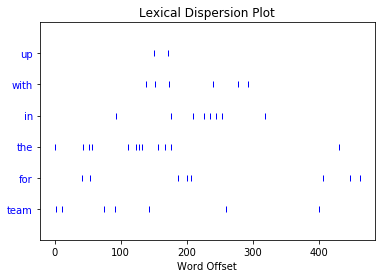

In [1]:
text.dispersion_plot(["up", "with", "in", "the", "for", "team"])


### generation



In [1]:
text.generate(["The", "job", "is", "for", "data", "team"])

# Out[110]:


### normalizing



1.  steaming



1.  lemmatization




### vocabulary



1.  sorted set



In [1]:
sorted(set(text))

# Out[111]:
#+BEGIN_EXAMPLE
  ['17',
  '2008',
  '23',
  '3',
  '40',
  '5',
  '<',
  'a',
  'able',
  'about',
  'academic',
  'across',
  'active',
  'adapt',
  'additional',
  'advertising',
  'all',
  'also',
  'an',
  'analysis',
  'analysts',
  'analytical',
  'analytics',
  'analyzing',
  'and',
  'anja',
  'are',
  'area',
  'art',
  'as',
  'aspects',
  'assistance',
  'at',
  'atmosphere',
  'attitude',
  'available',
  'backgrounds',
  'basis',
  'behavior',
  'beverages',
  'bieten',
  'brands',
  'bringing',
  'building',
  'business',
  'but',
  'celebrate',
  'centrally',
  'challenges',
  'change',
  'changing',
  'choose',
  'closely',
  'coaching',
  'com',
  'come',
  'commerce',
  'committed',
  'communicating',
  'comparable',
  'competitive',
  'computer',
  'conflicts',
  'connecting',
  'context',
  'contribute',
  'crm',
  'customer',
  'customers',
  'daily',
  'data',
  'databases',
  'de',
  'decided',
  'decisions',
  'deep',
  'department',
  'develop',
  

1.  lexical richness



1.  tryout



In [1]:
len(text) / len(set(text))

1.  function



In [1]:
def lexical_diversity(text):
    return len(text) / len(set(text))

# Out[113]:
1.6950819672131148

1.  specific word



1.  tryout



In [1]:
100 * text.count('for') / len(text)

# Out[117]:
1.5473887814313345

1.  functyion



In [1]:
def word_percentage(word):
    return 100 * text.count(word) / len(text)


### TODO Build a corpus !



1.  sklearn



In [1]:
docs = df['desc']

tfs = tfidf.fit_transform(docs)